In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 22.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima    

In [5]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [6]:
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)

In [7]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [8]:
df.index.freq = 'MS' 
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


In [9]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = ''

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

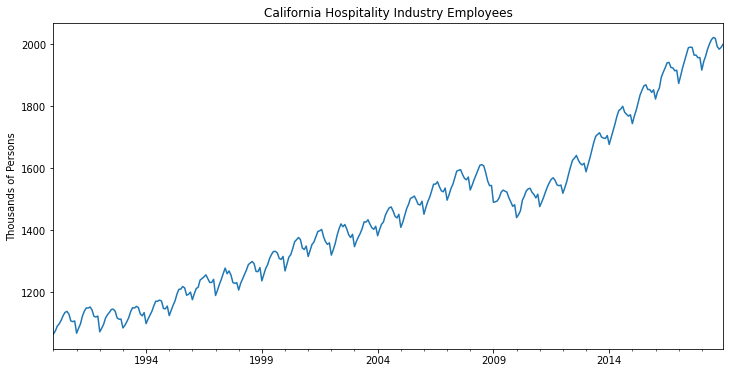

In [10]:
ax = df['Employees'].plot(figsize=(12,6),title=title) 
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [11]:
r = seasonal_decompose(df['Employees'],model='additive') 

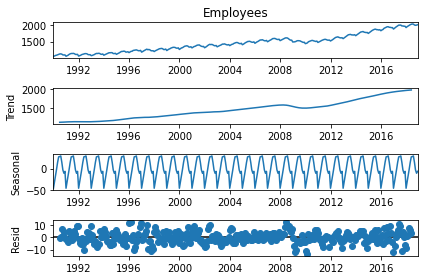

In [12]:
r.plot();

In [16]:
import pmdarima

In [17]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 13 Dec 2021   AIC                           2208.504
Time:                                      12:49:15   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))

In [24]:
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Mon, 13 Dec 2021   AIC                           2128.116
Time:                                      12:51:53   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.264      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.602      0.000      -1.097      -0.820
ma.L2          0.1498      0.061      2.462      0.014       0.031       0.269
ar.S.L12       0.9973      0.001    729.934      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.157      0.000      -0.838      -0.666
sigma2        28.7621      1.684     17.079      0.000      25.461      32.063
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12)) 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Mon, 13 Dec 2021   AIC                           2196.814
Time:                                    12:52:15   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
start=len(train) 
end=len(train)+len(test)-1

In [28]:
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(0, 1, 0)x(2, 0, 0, 12)')

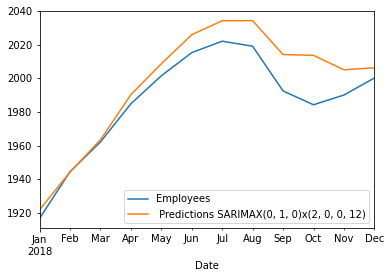

In [29]:
test['Employees'].plot(legend=True)
predictions.plot(legend=True)

In [30]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = ''

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

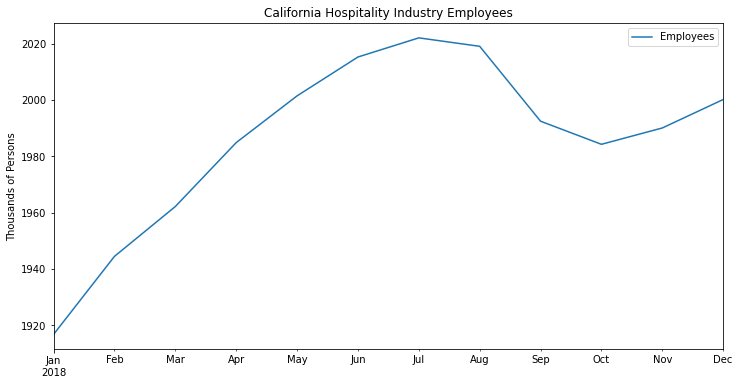

In [31]:
ax = test['Employees'].plot(legend=True, figsize=(12,6),title=title) 
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [32]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [33]:
mse_error = mean_squared_error(test['Employees'], predictions)
rmse_error = rmse(test['Employees'], predictions)

In [34]:
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}')
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506597
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222836


In [35]:
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}') 
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}') 

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506597
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222836


In [36]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 13 Dec 2021   AIC                           2208.504
Time:                                      12:54:54   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) Forecast')

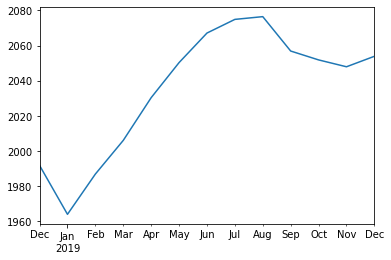

In [38]:
fcast.plot()

In [39]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = ''

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

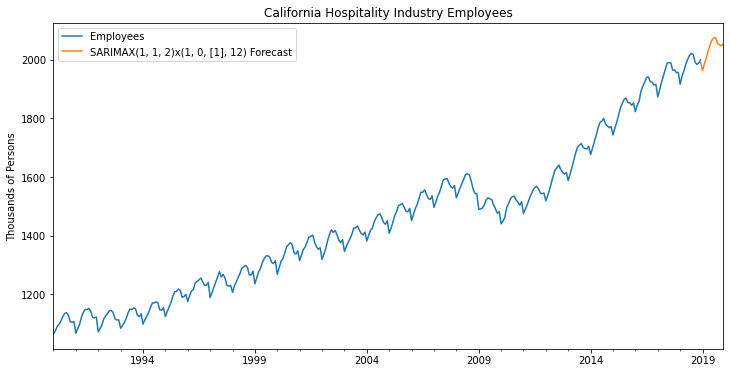

In [40]:
ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [42]:
!pip install Prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
     |████████████████████████████████| 216 kB 11.4 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641588 sha256=525966e163fa5c2644751cb5a10ccd654504767df0d9f1273122fc01a173a128
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [43]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [44]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [45]:
train.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [46]:
test.head()

,Employees
Date,
2018-01-01,1916.8
2018-02-01,1944.5
2018-03-01,1962.2
2018-04-01,1984.9
2018-05-01,2001.5


In [48]:
!pip install pystan
!pip install fbprophet

  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, but you have cmdstanpy 0.9.5 which is incompatible.


In [49]:
from fbprophet import Prophet

In [50]:
model = Prophet()
model

In [51]:
train_0 = train.reset_index() 
test_0 = test.reset_index()

In [52]:
train_0.head()

,Date,Employees
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [53]:
train_0.columns = ['ds', 'y'] 
test_0.columns = ['ds', 'y']

In [54]:
train_0.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [55]:
model.fit(train_0)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future = model.make_future_dataframe(periods=12, freq='MS') 
future.tail(12)

,ds
336,2018-01-01
337,2018-02-01
338,2018-03-01
339,2018-04-01
340,2018-05-01
341,2018-06-01
342,2018-07-01
343,2018-08-01
344,2018-09-01
345,2018-10-01


In [57]:
forecast = model.predict(future)
forecast.head

<bound method NDFrame.head of             ds        trend  ...  multiplicative_terms_upper         yhat
0   1990-01-01  1105.140489  ...                         0.0  1058.929072
1   1990-02-01  1105.802454  ...                         0.0  1073.898372
2   1990-03-01  1106.400357  ...                         0.0  1088.970422
3   1990-04-01  1107.062322  ...                         0.0  1104.785359
4   1990-05-01  1107.702933  ...                         0.0  1121.736986
..         ...          ...  ...                         ...          ...
343 2018-08-01  2046.943866  ...                         0.0  2076.369515
344 2018-09-01  2053.068394  ...                         0.0  2067.030396
345 2018-10-01  2058.995356  ...                         0.0  2054.682992
346 2018-11-01  2065.119884  ...                         0.0  2052.813211
347 2018-12-01  2071.046846  ...                         0.0  2063.225608

[348 rows x 16 columns]>

In [58]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
343,2018-08-01,2076.369515,2065.301114,2086.788509
344,2018-09-01,2067.030396,2055.875015,2078.637894
345,2018-10-01,2054.682992,2042.840415,2066.215007
346,2018-11-01,2052.813211,2039.812913,2064.664370
347,2018-12-01,2063.225608,2049.005558,2076.969270


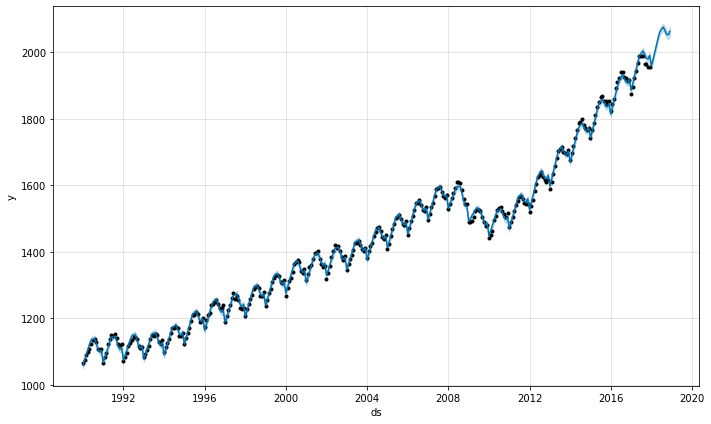

In [59]:
model.plot(forecast);

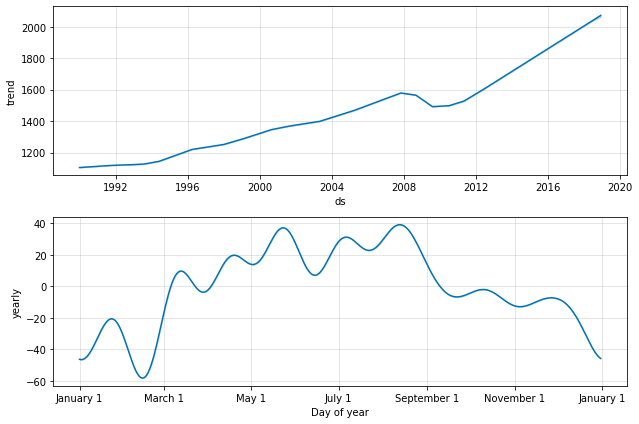

In [60]:
model.plot_components(forecast);

In [61]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast['yhat'].tail(12), test_0['y']) 

51.062927174242624

In [62]:
modul_dif = np.abs(forecast.tail(12).reset_index()['yhat'] - test_0['y'])

In [63]:
dif = np.mean(modul_dif/test_0['y']) # считаем среднее арифметическое отклонение 
dif_percent = dif*100 # получаем процент
dif_percent

2.5677471600830106

In [64]:
np.mean(np.abs(forecast.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

2.5677471600830106

In [65]:
model_1 = Prophet(growth = 'linear', yearly_seasonality = True, seasonality_mode='additive') 
model_1.fit(train_0)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
future_1 = model_1.make_future_dataframe(periods=12, freq='MS') 
forecast_1 = model_1.predict(future_1) 
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(12), test_0['y'])
print('MSE: ', error_forecast_1)

MSE:  51.062927174242624


In [67]:
np.mean(np.abs(forecast_1.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

2.5677471600830106